 # Projeto Segmentação de clientes de superlojas globais 

In [56]:
# Imports

import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Formatação dos gráficos
plt.style.use('fivethirtyeight')
plt.figure(1, figsize = (15,6))
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Versões dos pacotes usados neste jupyter notebook

%reload_ext watermark
%watermark -a "Carlos Rodrigues" --iversions

Author: Carlos Rodrigues

pandas    : 1.4.4
matplotlib: 3.5.2
numpy     : 1.21.5
seaborn   : 0.11.2



### Carregando e compreeendendo os dados

In [3]:
# Carregando o dataset

df_superstore = pd.read_excel('dados\Global Superstore 2018.xlsx')

In [4]:
# Shape
df_superstore.shape

(51290, 24)

In [5]:
df_superstore.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,24599,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.82,2,0.0,102.42,39.66,Medium
1,29465,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.54,9,0.0,104.49,18.72,Medium
2,24598,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,TEC-MA-4211,"Epson Receipt Printer, White",Machines,Technology,346.32,3,0.0,13.77,14.10,Medium
3,24597,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,FUR-FU-5726,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.68,4,0.0,79.68,11.01,Medium
4,29464,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,OFF-EN-3664,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.88,4,0.0,24.36,5.72,Medium
5,28879,ID-2015-AJ107801-42113,2015-04-19,2015-04-22,First Class,AJ-107801,Anthony Jacobs,Corporate,NaN,Kabul,...,FUR-TA-3420,"Bevis Conference Table, Fully Assembled",Tables,Furniture,4626.15,5,0.0,647.55,835.57,High
6,27993,IN-2017-GM144551-42948,2017-08-01,2017-08-05,Standard Class,GM-144551,Gary Mitchum,Home Office,NaN,Kabul,...,FUR-BO-3626,"Bush Classic Bookcase, Pine",Bookcases,Furniture,2070.15,5,0.0,848.70,185.01,Medium
7,28967,IN-2017-VB217451-43080,2017-12-11,2017-12-15,Standard Class,VB-217451,Victoria Brennan,Corporate,NaN,Kabul,...,FUR-CH-4683,"Hon Rocking Chair, Red",Chairs,Furniture,914.34,7,0.0,356.58,106.41,High
8,29492,IN-2016-LO171701-42637,2016-09-24,2016-09-28,Standard Class,LO-171701,Lori Olson,Corporate,NaN,Kabul,...,TEC-PH-5814,"Samsung Audio Dock, VoIP",Phones,Technology,1168.44,7,0.0,443.94,92.34,Medium
9,28966,IN-2017-VB217451-43080,2017-12-11,2017-12-15,Standard Class,VB-217451,Victoria Brennan,Corporate,NaN,Kabul,...,TEC-PH-3129,"Apple Audio Dock, VoIP",Phones,Technology,500.94,3,0.0,115.20,79.59,High


### Dicionário de dados

#### Row ID       -  ID da linha  	   
#### Order ID     -	ID do pedido
#### Order Date   -	Data do pedido
#### Ship Date    -	Data de envio
#### Ship Mode    - 	Modo de envio
#### Customer ID	 -  Identificação do Cliente
#### Customer Name - nome do cliente
#### Segment       - Segmento
#### Postal Code	  - Código postal
#### City          -	Cidade
#### Product ID	  - ID do produto
#### Product Name  -	Nome do Produto
#### Sub-Category  -	Subcategoria
#### Category      -	Categoria
#### Sales	      - Vendas
#### Quantity	  - Quantidade
#### Discount	  - Desconto
#### Profit	      - Lucro
#### Shipping Cost - Frete
#### Order Priority - Ordem Prioritária

## Análise exploratória
### Vamos explorar os dados por diferentes perspectivas e compreender um pouco mais o relacionamento entre as variáveis

In [6]:
# Verificando o total de valores únicos por coluna
df_superstore.nunique()

Row ID            51290
Order ID          25728
Order Date         1429
Ship Date          1463
Ship Mode             4
Customer ID       17415
Customer Name       796
Segment               3
Postal Code         631
City               3650
State              1106
Country             165
Region               23
Market                5
Product ID         3788
Product Name       3788
Sub-Category         17
Category              3
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     16452
Order Priority        4
dtype: int64

In [7]:
# Verificando os tipos de dados
df_superstore.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Postal Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product ID                object
Product Name              object
Sub-Category              object
Category                  object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [8]:
# Verificando se existem valores NaN 
df_superstore.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Product Name          0
Sub-Category          0
Category              0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [9]:
# Exibindo todas as colunas
df_superstore.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Product Name',
       'Sub-Category', 'Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [10]:
# Selecionando as variáveis que serão utilizadas na análise. Optamos por excluir as variáveis: Row ID, Postal Code, Product ID.

df_superstore_select = df_superstore[['Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City',
       'State', 'Country', 'Region', 'Market', 'Product Name',
       'Sub-Category', 'Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority']]
df_superstore_select.shape

(51290, 21)

In [11]:
# Resumo estatístico
df_superstore_select.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.478567
std,487.565361,2.278766,0.212280,174.340972,57.251373
min,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [12]:
df_pivot = df_superstore_select.pivot_table(index = ['Order ID'], columns = ['Sub-Category'], values = 'Quantity').fillna(0).reset_index()
df_pivot.sample(10)

Sub-Category,Order ID,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
7347,ES-2016-JH1598548-42676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
24710,US-2016-PB1915018-42704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20625,MX-2017-PO1918036-42878,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14838,IN-2017-TB216257-43059,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
24166,US-2015-NL18310140-42241,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13972,IN-2017-DL1286527-43043,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24791,US-2016-SC20770140-42443,5.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,3.0,3.5,0.0,0.0
12589,IN-2015-TH211007-42183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1362,CA-2015-CM12190140-42265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
1902,CA-2015-QJ19255140-42316,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_pivot.shape

(25728, 18)

In [14]:
# Verificando os valores únicos
df_pivot.nunique()

Sub-Category
Order ID       25728
Accessories       26
Appliances        21
Art               36
Binders           38
Bookcases         26
Chairs            28
Copiers           23
Envelopes         25
Fasteners         28
Furnishings       30
Labels            23
Machines          22
Paper             30
Phones            27
Storage           38
Supplies          26
Tables            20
dtype: int64

In [15]:
# Resumo estatístico
df_pivot.describe()

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
count,25728.000000,25728.000000,25728.000000,25728.000000,25728.000000,25728.000000,25728.000000,25728.000000,25728.000000,25728.000000,25728.000000,25728.000000,25728.000000,25728.000000,25728.000000,25728.000000,25728.000000
mean,0.400569,0.226051,0.569451,0.738174,0.304921,0.446310,0.277162,0.303321,0.335915,0.406768,0.342066,0.184041,0.450022,0.431770,0.592937,0.310395,0.116514
std,1.365956,1.027486,1.557509,1.768696,1.166878,1.427367,1.108594,1.176391,1.239689,1.364199,1.272125,0.924672,1.433073,1.395649,1.572584,1.201822,0.753840
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000


In [16]:
# Verificando se existe valores nulos
df_pivot.isnull().sum()

Sub-Category
Order ID       0
Accessories    0
Appliances     0
Art            0
Binders        0
Bookcases      0
Chairs         0
Copiers        0
Envelopes      0
Fasteners      0
Furnishings    0
Labels         0
Machines       0
Paper          0
Phones         0
Storage        0
Supplies       0
Tables         0
dtype: int64

In [17]:
# Adicionando uma coluna na tabela
df_pivot2 = df_pivot.merge(df_superstore_select[['Order ID','City','Order Date']]) 
df_pivot2.head()

,Order ID,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,City,Order Date
0,AE-2014-PO8865138-41914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,Ajman,2014-10-02
1,AE-2014-PO8865138-41914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,Ajman,2014-10-02
2,AE-2016-EB4110138-42657,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ras al Khaymah,2016-10-14
3,AE-2016-EB4110138-42657,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ras al Khaymah,2016-10-14
4,AE-2016-MY7380138-42735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,Ras al Khaymah,2016-12-31


In [18]:
df_pivot2.nunique()

Order ID       25728
Accessories       26
Appliances        21
Art               36
Binders           38
Bookcases         26
Chairs            28
Copiers           23
Envelopes         25
Fasteners         28
Furnishings       30
Labels            23
Machines          22
Paper             30
Phones            27
Storage           38
Supplies          26
Tables            20
City            3650
Order Date      1429
dtype: int64

## Extraindo a granularidade de tempo

In [19]:
df_pivot2['Order Date'] = df_pivot2['Order Date'].astype(str)

In [20]:
df_pivot2.dtypes


Order ID        object
Accessories    float64
Appliances     float64
Art            float64
Binders        float64
Bookcases      float64
Chairs         float64
Copiers        float64
Envelopes      float64
Fasteners      float64
Furnishings    float64
Labels         float64
Machines       float64
Paper          float64
Phones         float64
Storage        float64
Supplies       float64
Tables         float64
City            object
Order Date      object
dtype: object

In [21]:
df_pivot2['mes'] = df_pivot2['Order Date'].apply(lambda x:time.strftime('%m', time.strptime(x, "%Y-%m-%d")))
df_pivot2

,Order ID,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,...,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,City,Order Date,mes
0,AE-2014-PO8865138-41914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,2.0,0.0,0.0,Ajman,2014-10-02,10
1,AE-2014-PO8865138-41914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,2.0,0.0,0.0,Ajman,2014-10-02,10
2,AE-2016-EB4110138-42657,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ras al Khaymah,2016-10-14,10
3,AE-2016-EB4110138-42657,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ras al Khaymah,2016-10-14,10
4,AE-2016-MY7380138-42735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,Ras al Khaymah,2016-12-31,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,ZA-2017-SM10005146-42972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Chingola,2017-08-25,08
51286,ZA-2017-SW10350146-42792,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lusaka,2017-02-26,02
51287,ZA-2017-SW10350146-42792,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lusaka,2017-02-26,02
51288,ZA-2017-TS11205146-42793,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ndola,2017-02-27,02


In [22]:
df_pivot

Sub-Category,Order ID,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
0,AE-2014-PO8865138-41914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0
1,AE-2016-EB4110138-42657,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AE-2016-MY7380138-42735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
3,AE-2017-GH4665138-43082,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0
4,AE-2017-JD5790138-42801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25723,ZA-2017-RC9960146-42988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
25724,ZA-2017-RP9390146-42830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
25725,ZA-2017-SM10005146-42972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
25726,ZA-2017-SW10350146-42792,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Análise Descritiva
### Distplot dos atributos usados para a segmentação

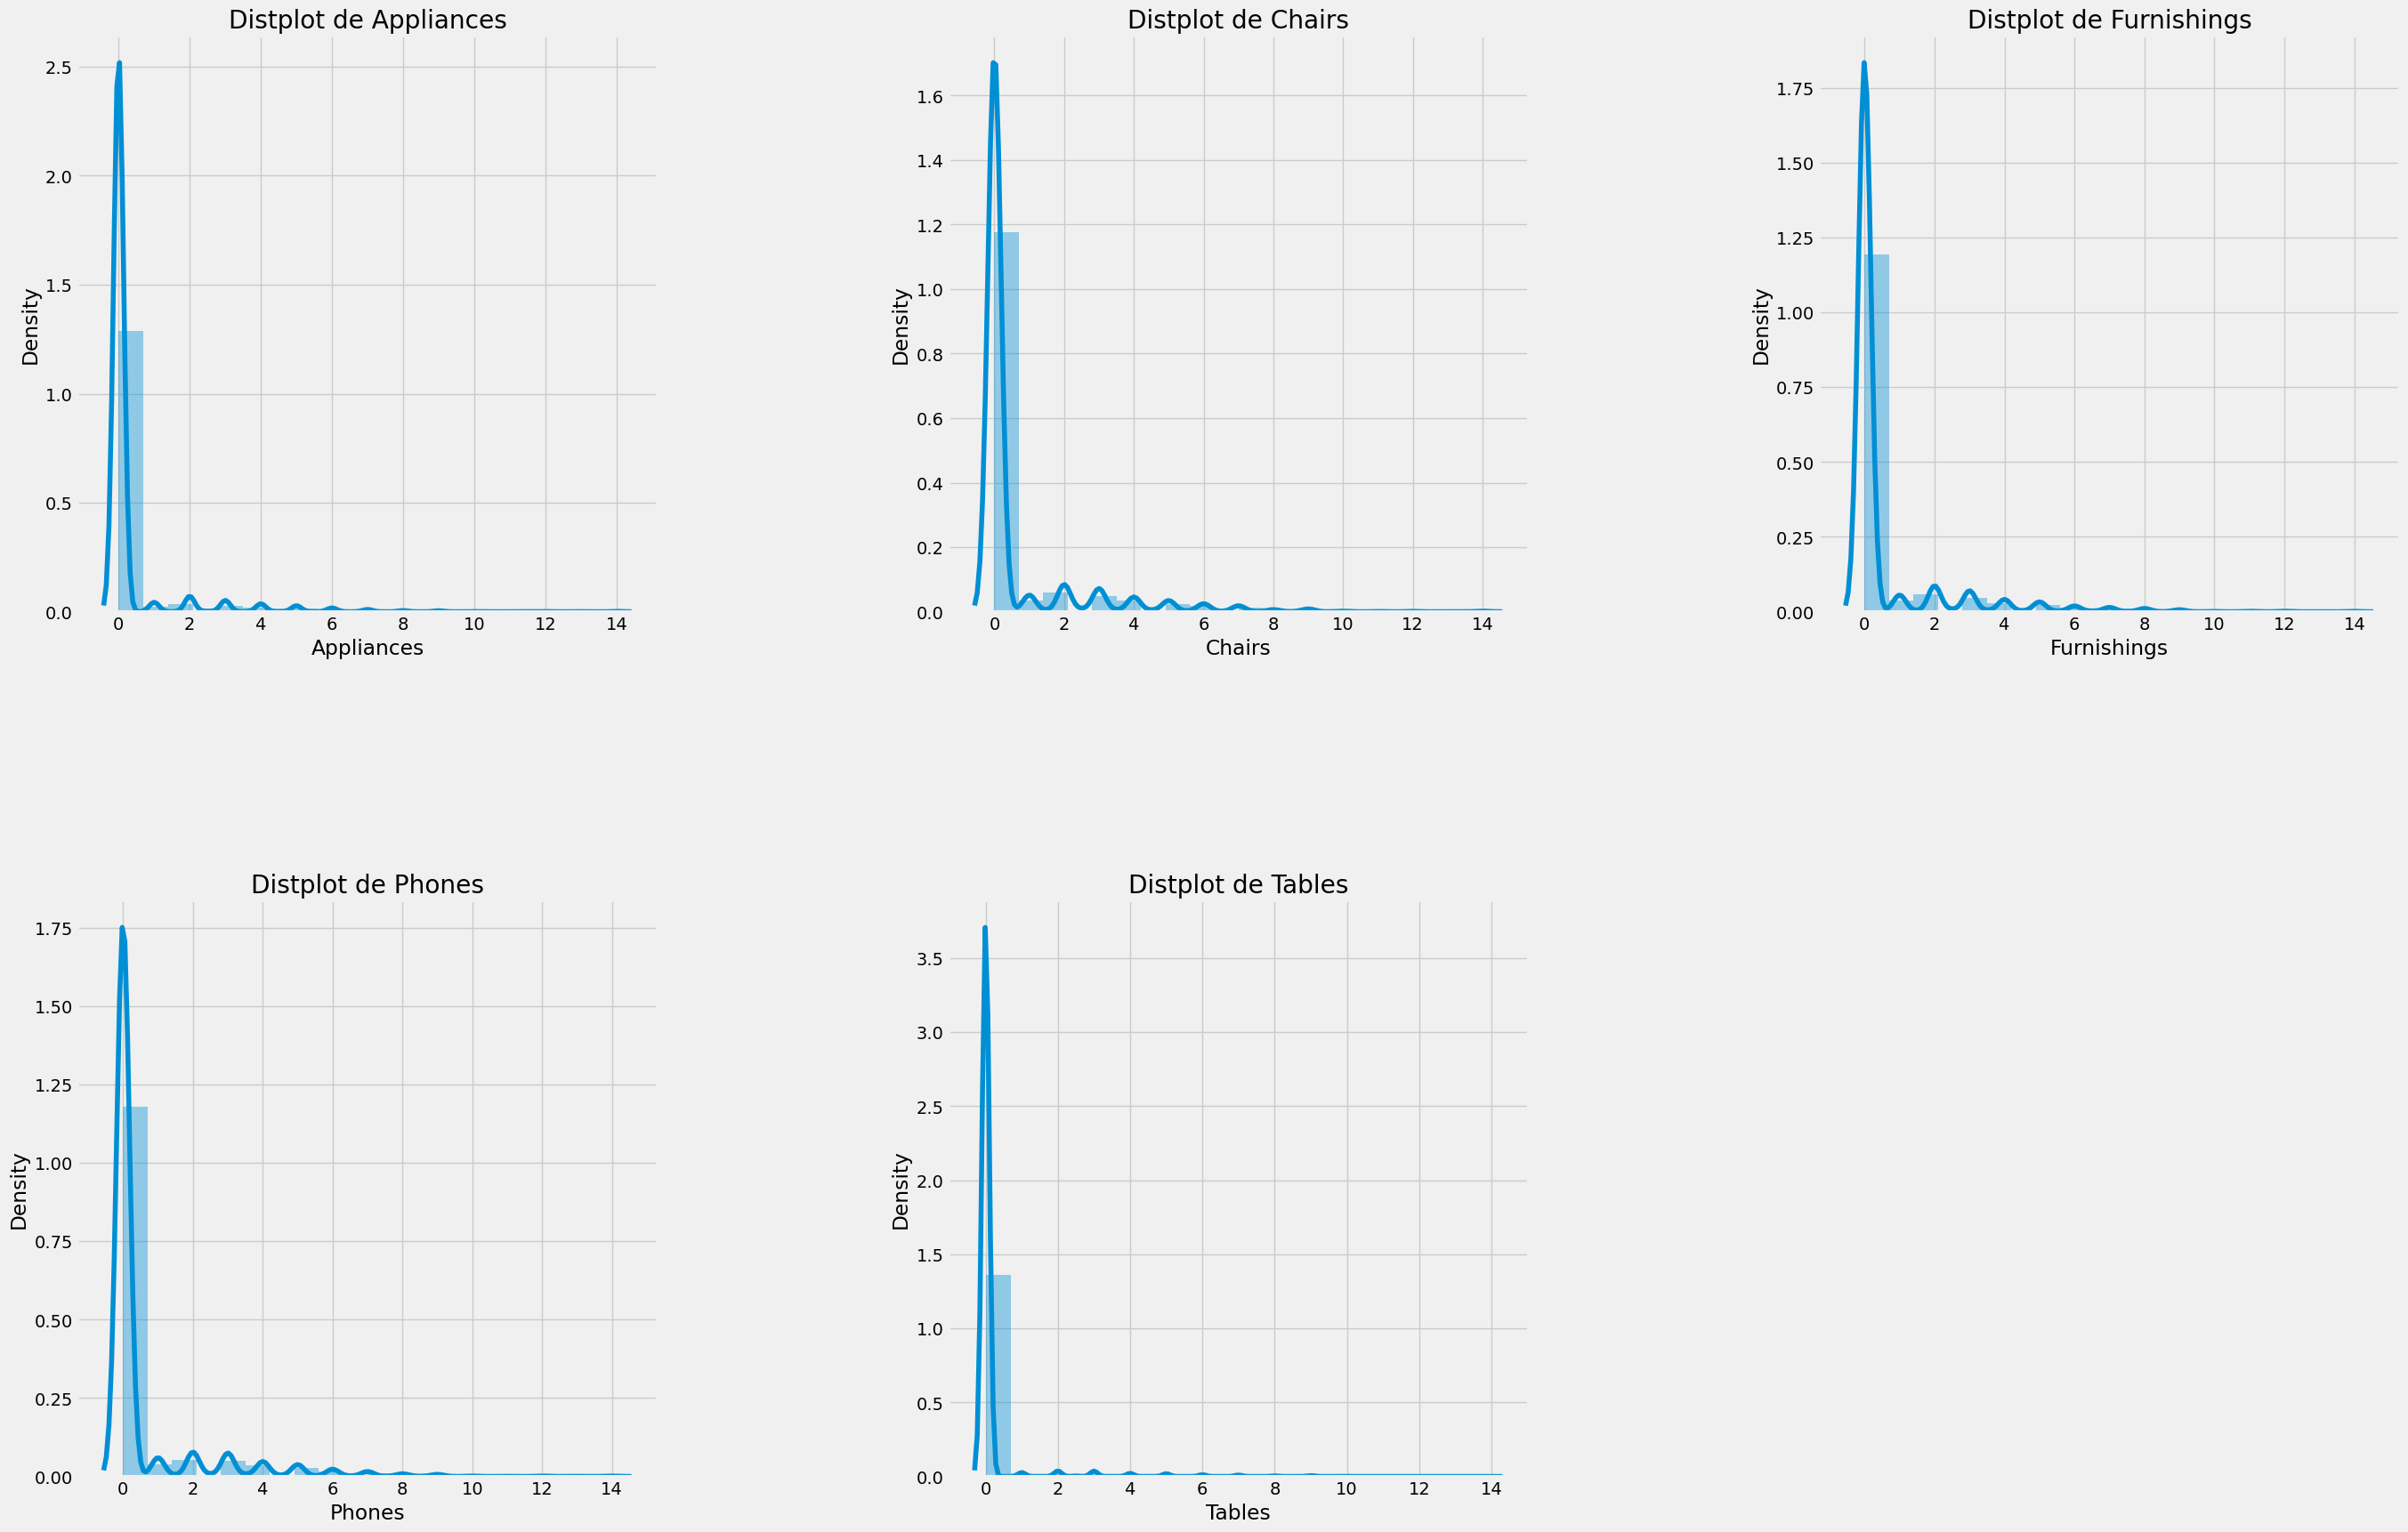

In [57]:
# Plot

# Tamanho da figura
plt.figure(1, figsize = (30,20))

# Inicializa o contador
n = 0

# loop'
for x in ['Appliances', 'Chairs', 'Furnishings', 'Phones', 'Tables']:
    n += 1
    plt.subplot(2, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df_pivot2[x], bins = 20)
    plt.title('Distplot de {}'.format(x))
plt.show()